<a href="https://colab.research.google.com/github/kwansawanth/bggdata/blob/main/Copy_of_Project2_66.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 : Analyzing data from MovieLens

**Due Date: Sunday, October 11**

**NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!**


## The MovieLens data sets

<img src="https://www.oreilly.com/api/v2/epubs/9781788993753/files/assets/dc0f89d7-6e9c-4790-a6c0-06725f2dbe8a.png">

https://movielens.org

In [ ]:
from IPython.lib.display import YouTubeVideo

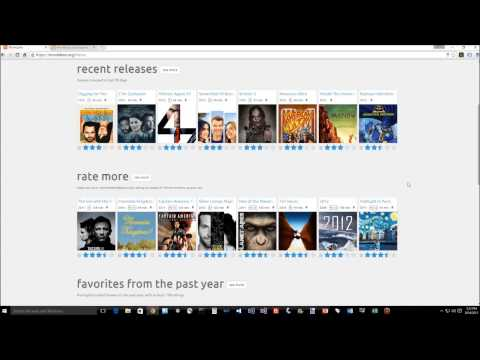

In [ ]:
YouTubeVideo('4tW9HY0Q460')

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

1. <name> <id>
2. <name> <id>
3. <name> <id>
4. <name> <id>
5. <name> <id>

**Objectives**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
    * http://grouplens.org/datasets/movielens/
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Useful Readings:**
* Chapter 14.2 (only the section on the MovieLens 1M Data Set), Chapter 5, 6.2, 7.2, 8, and 9 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (View pivately on Google Classroom).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)

**NOTE**: Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

# Problem 1:

## Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from https://grouplens.org/datasets/movielens/1m/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame. See
    * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
* Store the data into an HDF5 file. See
    * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_hdf.html
    * https://pandas.pydata.org/docs/reference/api/pandas.read_hdf.html

In [ ]:
from google.colab import drive
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
# To mount at google drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
ratings = pd.read_table("/content/drive/MyDrive/Big data 1 2566/ratings.dat", sep="::", header=None, names=['Users' , 'Movies' , 'Rating' ,'View'])
ratings

<ipython-input-2-611a938ca174>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_table("/content/drive/MyDrive/Big data 1 2566/ratings.dat", sep="::", header=None, names=['Users' , 'Movies' , 'Rating' ,'View'])


,Users,Movies,Rating,View
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [27]:
users_dat = pd.read_table("/content/drive/MyDrive/Big data 1 2566/users.dat", sep="::", header=None, names=['Users','Sex','Age','Occu','Postcode'])
users_dat

<ipython-input-27-89fe7e4756dc>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users_dat = pd.read_table("/content/drive/MyDrive/Big data 1 2566/users.dat", sep="::", header=None, names=['Users','Sex','Age','Occu','Postcode'])


,Users,Sex,Age,Occu,Postcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [20]:
movie_dat = pd.read_table("/content/drive/MyDrive/Big data 1 2566/movies.dat", sep="::", header=None, names=['Movies','Title','Genres'],encoding = "ISO-8859-1")
movie_dat

<ipython-input-20-8fbd82919f40>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movie_dat = pd.read_table("/content/drive/MyDrive/Big data 1 2566/movies.dat", sep="::", header=None, names=['Movies','Title','Genres'],encoding = "ISO-8859-1")


,Movies,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [28]:

df_rating = ratings.merge(movie_dat, how="left", on='Movies')
df_all =df_rating.merge(users_dat, how="left", on='Users')

df_all

,Users,Movies,Rating,View,Title,Genres,Sex,Age,Occu,Postcode
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,Weekend at Bernie's (1989),Comedy,M,25,6,11106
1000205,6040,1094,5,956704887,"Crying Game, The (1992)",Drama|Romance|War,M,25,6,11106
1000206,6040,562,5,956704746,Welcome to the Dollhouse (1995),Comedy|Drama,M,25,6,11106
1000207,6040,1096,4,956715648,Sophie's Choice (1982),Drama,M,25,6,11106


In [30]:
# Create a HDF5
ratings.to_hdf('data.h5', key='rating')
movie_dat.to_hdf('data.h5', key='movie')
users_dat.to_hdf('data.h5', key='user')
df_all.to_hdf('data.h5', key='data_all')

#Answer here

In [55]:
#How many movies have an average rating over 4.5 overall?
avg_rating = df_all[['Title','Rating']].groupby('Title').mean('Rating')
avg_r = avg_rating[avg_rating['Rating'] > 4.5].count()
print(f'Number of an average over 4.5 {avg_r}')

Number of an average over 4.5 Rating    21
dtype: int64


In [53]:
#How many movies have an average rating over 4.5 among men?
gender_rat= df_all[['Title','Sex','Rating']]
M_rat = gender_rat[gender_rat['Sex']== 'M']
avg_M_rating = M_rat.groupby('Title').mean()
am= avg_M_rating[avg_M_rating['Rating'] > 4.5].count()
print(f'Number of an average men over 4.5 {am}')

Number of an average men over 4.5 Rating    23
dtype: int64


<ipython-input-53-37dd8cf008f0>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_M_rating = M_rat.groupby('Title').mean()


In [58]:
#How many movies have an average rating over 4.5 women?
F_rating = gender_rat[gender_rat['Sex']=='F']
avg_F_rating = F_rating.groupby('Title').mean()
af= avg_F_rating[avg_F_rating['Rating'] > 4.5].count()
print(f'Number of an average female over 4.5 {af}')

Number of an average female over 4.5 Rating    51
dtype: int64


<ipython-input-58-1a91a9913fcf>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_F_rating = F_rating.groupby('Title').mean()


In [68]:
#How many movies have an median rating over 4.5 among men over age 30?
Age_rat=df_all[['Title','Age','Sex','Rating']]
over_age_M_rat = Age_rat[(Age_rat['Sex']== 'M') & (Age_rat['Age'] > 30)]
med_rat_M = over_age_M_rat.groupby('Title').median()
med = med_rat_M[med_rat_M['Rating'] > 4.5].count()
print(f'movies have an median rating over 4.5 among men over age 30 is {med}')

movies have an median rating over 4.5 among men over age 30 is Age       86
Rating    86
dtype: int64


<ipython-input-68-db686ea0b2c7>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  med_rat_M = over_age_M_rat.groupby('Title').median()


In [67]:
#How many movies have an median rating over 4.5 among female over age 30?
over_age_F_rat = Age_rat[(Age_rat['Sex']== 'F') & (Age_rat['Age'] > 30)]
med_rat_F = over_age_F_rat.groupby('Title').median()
med_F = med_rat_F[med_rat_F['Rating'] > 4.5].count()
print(f'movies have an median rating over 4.5 among female over age 30 is {med_F}')

movies have an median rating over 4.5 among female over age 30 is Age       149
Rating    149
dtype: int64


<ipython-input-67-20e1d04af780>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  med_rat_F = over_age_F_rat.groupby('Title').median()


In [76]:
#What are the ten most popular movies?
popular_movies_rat=df_all[['Title','Age','Sex','Rating']]
popular_movies_rat_5=popular_movies_rat[popular_movies_rat['Rating'] == 5 ]
ppl_movies = popular_movies_rat_5[['Title','Rating']].groupby('Title').count().sort_values(by='Rating',ascending = False)
print("The most popular is")
ppl_movies.iloc[:5]

The most popular is


,Rating
Title,
American Beauty (1999),1963
Star Wars: Episode IV - A New Hope (1977),1826
Raiders of the Lost Ark (1981),1500
Star Wars: Episode V - The Empire Strikes Back (1980),1483
"Godfather, The (1972)",1475


#Conjecture about American beauty(1999)
-เราได้คาดเดาว่าผู้ที่รับชมหนังเรื่อง American Beauty(1999) ส่วนมากเป็นผู้ชาย

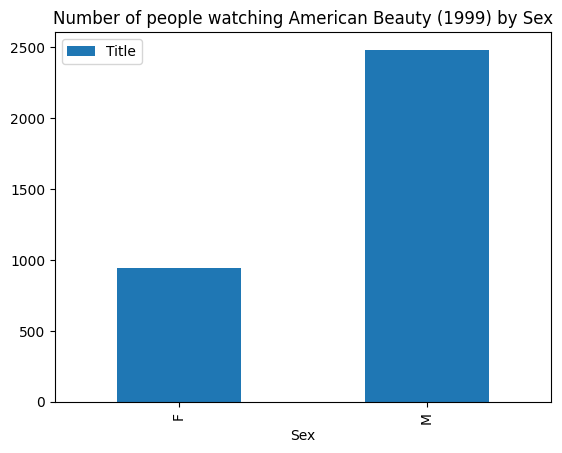

In [90]:
conjecture_1 = df_all[['Title','Sex']]
conjecture_1_amsb = conjecture_1[conjecture_1['Title']=='American Beauty (1999)']

conjecture_1_count = conjecture_1_amsb.groupby('Sex').count()
conjecture_1_count.plot(kind='bar',title='Number of people watching American Beauty (1999) by Sex')
plt.show()

# Problem 2: Expand your investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.**
* Plot a histogram of the ratings of all movies.
* Plot a histogram of the *number* of ratings each movie recieved.
* Plot a histogram of the *average rating* for each movie.
* Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------





# Problem 3:
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* Make a scatter plot of men versus women and their mean rating for every movie.
* Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

### A scatter plot of men versus women and their mean rating for every movie

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------




### A scatter plot of men versus women and their mean rating for movies rated more than 200 times

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------




### The correlation coefficent between the ratings of men and women

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------




## Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender

Example<br>
Conjecture 1: Men and women are more similar when they are older, consider their rating over the same genres.

Conjecture 2: Men and women more similar when they are academic/educator, artist, college/grad student, and programmer.

Conjecture 3: Men and women more similar when they watch Action, Drama, War, and Triller.

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------




# Problem 4:
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Sciencetist at a movie company.  **Convince your boss that your conjecture is correct!**

### For example, which movie to make/buy? (seperating via Genre?)

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------




# Done!

**What do you need to submit?**

* **Notebook File**: This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.


* **PPT Slides**: please prepare PPT slides (10 minutes)
    * Motivation about the data collection, why the topic is interesting to you. อธิบายเกี่ยวกับข้อมูล สร้างแรงบันดาลใจเดี่ยวกับข้อมูลให้ผู้รับฟัง ให้ผู้ฟังเข้าใจความเป็นมาและความสำคัญของข้อมูล
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What conjectures did you make and how did you support or disprove them using data?
    * Communicating Results with figures or tables
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report)
     
**How to submit:**

        ส่ง link ของ ipynb และ slides ในรูปแบบ pdf ใน Google Classroom
        
**Note: Each team just needs only one submission**